# Braço Robótico 

## Overview 
•O braço robótico é do tipo RP.

•A junta rotativa possui o comprimento $ r_{1}=500mm $ e um grau de liberade $ 0º \leq \theta \leq 90º$

•A junta prismática apresenta um comprimento $ 0mm \leq r_{2} \leq 500mm $

## Manipulação
•Para facilitar tanto o cinemático direto quanto o cinemático inverso, o braço robótico foi representado como dois vetores, um para a junta rotativa e outro para a junta prismática.

•O ponto de origem do braço robótico corresponde ao ponto de origem do sistem $O = (0,0)$

## Código
•O código de manipulação do robô foi feita em python3, utilizando o módulo vectors, numpy e matplotlib.

#### Imports 



In [1]:
import vectors
import matplotlib.pyplot as plt
import numpy as np

#### 1.0 Class definition e constructor
•Definiremos a classe `robotic_arm`, que tera:

    -origin_point: Ponto de origem do braço robótico;
    -arm_vector: Vetor que representará a junta rotativa;
    -retracting_arm_vector: Vetor que representará a junta prismática retrátil;
    -target: Ponto alvo da garra robótica.

In [2]:
class robotic_arm():

    def __init__(self):
        
        ######## Create variables for this class ########
        
        # The origin point for the robotic arm  
        self.origin_point = vectors.point(0,0)

        # the vector representing the rotating arm at the default position
        self.arm_vector = vectors.vector2(x=500,y=0)

        # The vector that represents the retracting arm
        self.retracting_arm_vector = vectors.vector2(500,0)

        # The target point used in the reverse kinematics
        self.target = vectors.point(0,0)

#### 1.1 `reset_rotating_arm( )`
•Método que retorna o vector representante da junta rotativa de volta para seu valor inicial de:
   $$\vec{v} = \begin{pmatrix} 500 \\ 0 \end{pmatrix}$$

In [3]:
    def reset_rotating_arm(self):

        # the vector representing the rotating arm at the default position
        self.arm_vector = vectors.vector2(x=500,y=0)

#### 1.2 `reset_retracting_arm( )`
•Método que extende a junta prismática para seu comprimento máximo $r_2=500 mm$ paralelo ao eixo $x$


In [4]:
    def reset_retracting_arm(self):

        # The vector that represents the retracting arm
        self.retracting_arm_vector = vectors.vector2(500,0)

#### 1.3 `set_target( )`
•Método que recebe um `vector.point` como parâmetro e implementa ele como ponto alvo da garra robótica

In [5]:
    def set_target(self, target_point):

        self.target = target_point

#### 1.4 `calculate_movemet_to_target( )`
•Método que faz todos os cálculos necessários para mover as juntas do robô para que consiga chegar no ponto alvo.

##### 1º Passo:

   Determinar o vetor da origem do robo $O=(0,0)$ até o ponto alvo $A=(x_{1},y_{1})$ através do método `vector_from_points( )` do módulo `vectors`
   
  $$\vec{V} = \vec{OA} = \begin{pmatrix} x_{1} - 0 \\ y_{1} - 0 \end{pmatrix}$$
  
##### 2º Passo:

   Devemos conferir se a norma desse vetor é menor do que a norma do vetor rotativo, pois é a menor norma que o braço consegue alcançar. Se for menor o algoritmo retornará um erro.
   
##### 3º Passo:

   Calculamos o ângulo entre o vetor $\vec{V}$ e o eixo $x$.
   
   $$ \lVert \vec{V} . \vec{x_{0}} \rVert  = \lVert \vec{V} \rVert . \lVert \vec{x_{0}} \rVert . \cos {\theta} $$

$$ \cos {\theta} = \dfrac{\lVert \vec{V} . \vec{x_{0}} \rVert} {\lVert \vec{V} \rVert . \lVert \vec{x_{0}} \rVert} $$

$$ \theta = \arccos{\left(\dfrac{\lVert \vec{V} . \vec{x_{0}} \rVert} {\lVert \vec{V} \rVert . \lVert \vec{x_{0}} \rVert}\right)} $$

##### 4º Passo:

   Verificamos se o angulo $\theta$ está dentro dos limites da junta rotativa : 
   $$0º \leq \theta \leq 90º$$
   
   Se estiver fora do aceitável, o algoritmo retornará um erro.
   
   
##### 5º Passo:

   Ao calcularmos o ângulo, nós rotacionamos o vetor da junta rotativa $\thetaº:$
   
   $$ \vec{v'} = R_{\theta} . \vec{v} $$ 

$$ v' = \begin{pmatrix} \cos{\theta} & -\sin{\theta} \\  \sin{\theta} & \cos{\theta} \end{pmatrix} . \begin{pmatrix} x \\ y \end{pmatrix}$$

##### 6º Passo:

   Calculamos quanto que o braço retrátil deve se extender para finalmente alcançar o ponto alvo.
   
   Fazemos isso subtraindo o vetor $\vec{v}$ que representa a junta rotativa com norma fixa do $\vec{V}$ que representa o vetor da origem até o ponto alvo.
   
   $$\vec{w} = \vec{V} - \vec{v}$$
   
##### 7º Passo:

   Conferimos a norma do vetor $\vec{w}$, se for maior do que o alcance máximo da junta prismática, o algortimo retornará um erro notificando o usuário.

In [6]:
    def calculate_movemet_to_target(self):

        # First determine the vector from the origin point of the robot to the target point 
        v = self.origin_point.vector_from_points(self.target)

        # If the norm of the v vector is smaller than 500, it's outside the workspace since the smallest
        # vector possible is when the retracting arm = 0
        if v.norm() < 500:
            raise KeyError('[ERROR] Range error: Point outside workspace')

        # Check to see if the angle between the v target vector and the x axis is outside the arms range (0<=angle<=90)
        reference_angle = v.angle()
        if reference_angle > 90 or reference_angle<0:
            raise KeyError('[ERROR] Range Error: The angle desired %s is outsie the range of motion'%(str(reference_angle)))
       
        # Calculate the angle which the arm will have to rotate from its current position to go to the target position
        target_angle = v.angle(self.arm_vector)

        # Rotate the arm vector that amount 
        self.arm_vector = self.arm_vector.rotate_vector(target_angle)

        # subtract the arm vector from the target v vector, which will result in how much the retracting arm will need to move 
        self.retracting_arm_vector = v - self.arm_vector

        # The max length of the retracting is 0,5m (aka 500mm)so if the nor of the vector is gratter than that, raise an error
        if self.retracting_arm_vector.norm() > 500:
            raise KeyError('[ERROR] Range error: Point outside workspace')
        
        print('The angle of movement is:',target_angle)
        print('The vector representing the rotating arm is:', self.arm_vector)
        print('The vector representing the retracting arm is:', self.retracting_arm_vector)

#### 1.5 `rotate_robotic_arm( )`
• Método para fazer a rotação da junta rotativa, como explicado na seção 1.4:

 $$ \vec{v'} = R_{\theta} . \vec{v} $$ 

$$ v' = \begin{pmatrix} \cos{\theta} & -\sin{\theta} \\  \sin{\theta} & \cos{\theta} \end{pmatrix} . \begin{pmatrix} x \\ y \end{pmatrix}$$

In [16]:
    def rotate_robotic_arm(self,angle):

        # rotate the robotic arm 
        self.arm_vector = self.arm_vector.rotate_vector(angle)
        
        # also 'rotate' the retracting arm 
        self.retracting_arm_vector = self.retracting_arm_vector.rotate_vector(angle - self.arm_vector.angle())

#### 1.6 `extand_arm( )`
•Método para extender ou diminuir o vetor da junta prismática.

•Como o vector que representa a junta prismática é Linearmente Dependente do vetor que representa a junta rotativa, para determinarmos as componentes $x$ e $y$ do vetor prismático precisamos apenas multiplicar o vetor rotativo por um escalar $\alpha$ que represente a porcentagem do valor total do vetor prismático.
$$0 \leq \alpha \leq 1$$

In [8]:
    def extand_arm(self, percentage):
        
        self.retracting_arm_vector = self.arm_vector.multiplication_by_scalar(percentage)

#### 1.7 `plot_robotic_arm( )`

•Método para visualizar os vetores que representam o braço robótico.

•Utilizamos o módulo `matplotlib`.

In [9]:
    def plot_robotic_arm(self):

        %matplotlib inline

        # Create the subplots
        fig,ax = plt.subplots()

        # create the vector representation of the rotating robotic arm
        ax.quiver(self.origin_point.x,self.origin_point.y, self.arm_vector.x , self.arm_vector.y,color='orange' , units='xy' ,scale=1)

        # Create the vector that will represent the retracting robot arm 
        plt.quiver(self.arm_vector.x,self.arm_vector.y, self.retracting_arm_vector.x, self.retracting_arm_vector.y,color='b', units='xy' ,scale=1)

        # Equalize the axis and vectors 
        ax.set_aspect('equal')

        # set the grids 
        plt.grid()

        # set the limits in the graph 
        plt.xlim(0,1000)
        plt.ylim(0,1000)

        # set the labels 
        plt.xlabel('X component (mm)')
        plt.ylabel('Y component (mm)')

        plt.title('Robotic Arm')

        # show the plot
        plt.show()

#### 1.8 `plot_workspace( )`
•Método "brute force" de determinação e vizualização do workspace do robô.

•Calculado através de $9 . 10^6$ iteratons ( i.e $9 . 10^6$ pontos calculados), armazenando as coordenadas desses pontos encontrados e depois são vizualizados em um scatter plot utilizando matplotlib.

In [10]:
    def plot_workspace(self):
        
        %matplotlib inline
        
        x_coordinates = []
        y_coordinates = []

        # Iterate through all the possible angles for the rotating robotic arm 
        for angle in np.arange(0,90.01,0.01):

            # move the robotic arm 
            self.rotate_robotic_arm(angle)

            # Iterate through all the possible lengths of the extending arm 
            for percentage_of_arm in np.arange(0,1.001,0.001):

                # update the arm lenght 
                self.extand_arm(percentage_of_arm)

                # Calculate the x coordinate of the tip of the arm
                x_coordinates.append(self.origin_point.x+self.arm_vector.x+self.retracting_arm_vector.x)

                # Calculate the y cooridnate of the tip of the arm 
                y_coordinates.append(self.origin_point.y+self.arm_vector.y+self.retracting_arm_vector.y)

                # reset the lenght of the arm 
                self.reset_retracting_arm()


            # set the robotic arm back to the original position 
            self.reset_rotating_arm()

        # Plot all the poinst 
        plt.plot(x_coordinates,y_coordinates,'o',color = ('black'))
        plt.title("Robot's Workspace")
        plt.show()

## Exemplos 

### Cinemática Direta 


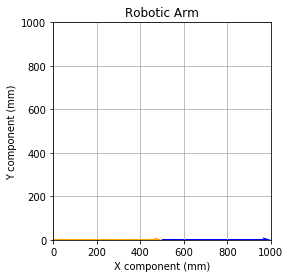

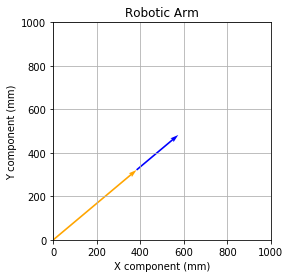

In [20]:
# import the necessary modules
import vectors
import robot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Instantiate the robot_arm class 
garra = robot.robotic_arm()

# plot the arm in the default position
garra.plot_robotic_arm()

# change the angle and the size of the retracting arm and plot again
garra.rotate_robotic_arm(40)
garra.extand_arm(.5)
garra.plot_robotic_arm()

## Cinemática Indireta 

The angle of movement is: 45.00000000000001
The vector representing the rotating arm is: [[353.555],[353.555]]
The vector representing the retracting arm is: [[246.445],[246.445]]


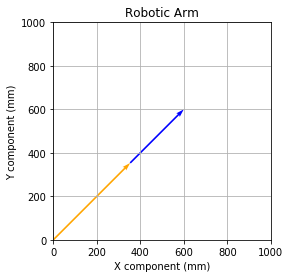

In [29]:
# import the necessary modules
import vectors
import robot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Instantiate the robot_arm class 
garra = robot.robotic_arm()

# Create a point which is going to be our target point 
target_point = vectors.point(600,600)
garra.set_target(target_point)

# Calculate the robot's movement
garra.calculate_movemet_to_target()
garra.plot_robotic_arm()

## Workspace

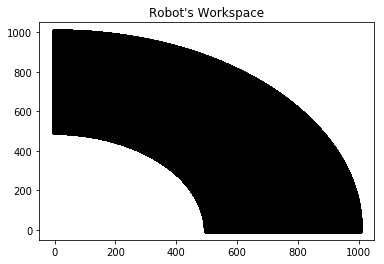

In [30]:
# import the necessary modules
import vectors
import robot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Instantiate the robot_arm class 
garra = robot.robotic_arm()
garra.plot_workspace()